- A spoken sentence is a sequence of phonemes. Speech signals are thus time-variant in character.
- To extract information from a signal, we must therefore split the signal into sufficiently short segments, such that, heuristically speaking, each segment contains only one phoneme. In other words, we want to extract segments which are short enough that the properties of the speech signal does not have time change within that segment.
- *Windowing* is a classical method in signal processing and it refers to splitting the input signal into temporal segments. The borders of segments are then visible as discontinuities, which are incongruent with the real-world signal.
- To reduce the impact of segmenting, on the statistical properties of the signal, we apply windowing to the temporal segments. Windowing functions are smooth functions which go to zero at the border. By multiplying the input signal with a window function, the windowing function also goes to zero at the border such that the discontinuity at the border becomes invisible. 
- Windowing does thus change the signal, but the change is designed such that its effect on signal statistics is minimized.

In [9]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline
plt.rc("figure", figsize = (16, 4))

In [3]:
x, sr = librosa.load('./audio/SA1.WAV')

In [12]:
def convert_wav_to_float(data):
    if data.dtype == np.uint8:
        data = (data - 128) / 128.
    elif data.dtype == np.int16:
        data = data / 32768.
    elif data.dtype == np.int32:
        data = data / 2147483648.
    return data

x = convert_wav_to_float(x)

In [13]:
sr

22050

In [14]:
n_samples = len(x)
total_duration = n_samples / sr
sample_times = np.linspace(0, total_duration, n_samples)

In [15]:
total_duration

2.9248526077097505

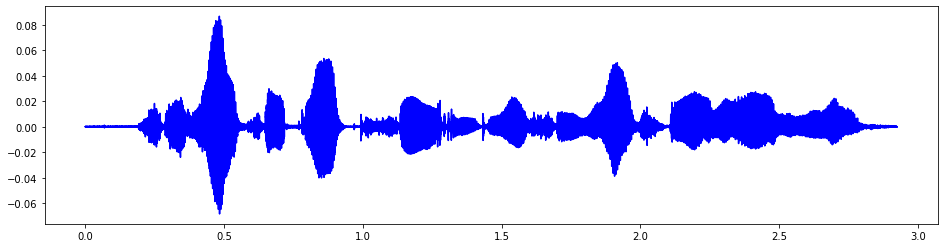

In [16]:
plt.plot(sample_times, x, color = 'b')

NameError: name 'scipy' is not defined

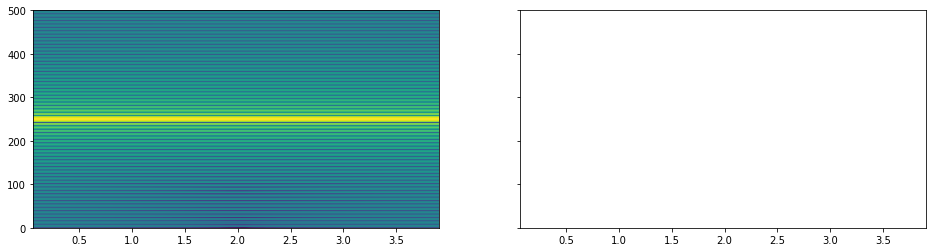

In [17]:
duration = 4
sine_frequency = 250
time = np.linspace(0, duration, 1000*duration)
sine_wave = np.sin(2*np.pi*sine_frequency * time)
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
kwargs = dict(x=sine_wave, Fs = 1000, NFFT = 256, noverlap = 128, pad_to = 512)
axs[0].specgram(window=np.bartlett(256), **kwargs)
axs[1].specgram(window=librosa.(256, int(256 / 6)), **kwargs)
axs[0].set_ylim(175, 325)
axs[0].set_ylabel('frequency (Hz)')
axs[0].set_xlabel('time')
axs[1].set_xlabel('time')
axs[0].set_title('Triangular window')
axs[1].set_title('Gaussian window');